In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Accessories_inventory_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             23 non-null     object 
 1   SKU                      23 non-null     object 
 2   Price                    23 non-null     float64
 3   Availability             23 non-null     int64  
 4   Number of products sold  23 non-null     int64  
 5   Revenue generated        23 non-null     float64
 6   Customer demographics    23 non-null     object 
 7   Stock levels             23 non-null     int64  
 8   Lead times               23 non-null     int64  
 9   Order quantities         23 non-null     int64  
 10  Shipping times           23 non-null     int64  
 11  Shipping carriers        23 non-null     object 
 12  Shipping costs           23 non-null     float64
 13  Supplier name            23 non-null     object 
 14  Location                 23 

In [4]:
df = df[["Availability", "Number of products sold", "Order quantities", "Production volumes", "Inspection results", "Defect rates"]]

In [5]:
df.head()

,Availability,Number of products sold,Order quantities,Production volumes,Inspection results,Defect rates
0,59,426,11,564,Fail,0.398177
1,78,150,15,769,Pending,2.709863
2,82,126,85,453,Fail,0.102021
3,60,601,7,791,Pending,0.018608
4,30,391,29,568,Pending,1.342292


In [6]:
df["Inspection results"].unique()

array(['Fail', 'Pending', 'Pass'], dtype=object)

In [7]:
mapping = {'Fail': -1, 'Pass': 1, 'Pending': 0}
df.loc[:, 'Inspection results'] = df['Inspection results'].map(mapping).fillna(0)

In [8]:
df["Inspection results"].unique()

array([-1, 0, 1], dtype=object)

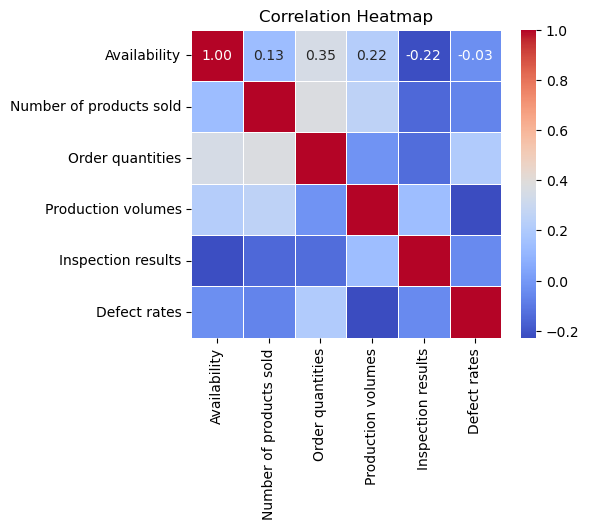

In [9]:
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input

X = df[["Availability", "Number of products sold", "Order quantities", "Production volumes", "Inspection results"]]
y = df["Defect rates"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

model = Sequential([
    Input(shape=(X_train.shape[1],)),  
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

predictions = model.predict(X_test)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 4977.8735 - val_loss: 2842.3923
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 3667.6394 - val_loss: 1957.7300
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 2586.2075 - val_loss: 1304.8452
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 1746.7089 - val_loss: 824.2601
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 1103.1227 - val_loss: 479.3020
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 636.0098 - val_loss: 260.0962
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 324.7764 - val_loss: 159.5849
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 141.5640 - val_loss: 145.5246
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 81.5081 - val_loss: 190.6290
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 109.6233 - val_loss: 269.7216
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 189.1786 - val_loss: 356.7371
Epoch 12/100
1/1 ━

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Mean Squared Error (MSE): 2.266645
R-squared (R²): -1.095754824764429


In [13]:
import pickle

filename = "Accessories_inventory_data_deficit_rates.pkl"

with open(filename, "wb") as file:
    pickle.dump(model, file)

print(f"Model successfully saved to {filename}")

Model successfully saved to Accessories_inventory_data_deficit_rates.pkl
